In [7]:
import PowerSystemClasses as ps
import opendssdirect as dss

def main():
    Dnetwork = ps.DistNetwork()

    components = {'nodes': 'nodes.csv',
              'line_geos': 'LineGeometry.csv',
              'wire_data': 'WireData.csv',
              'CN_data': 'CNData.csv',
              'lines': 'lines.csv',
              'loads': 'loads.csv',
              'xfmrs': 'xfmrs.csv',
              'circuit': 'circuit.csv'}
    
    Dnetwork.add_network_components(components)

    Dnetwork.compile_DSS()
    sub_meter = ps.Meter(circ_element='Transformer', bus1='src_node', bus2='n0')
    sub_meter.to_DSS()

    Dnetwork.solve_DSS()
    Dnetwork.record_DSS_bus_voltages()
    return Dnetwork
    

DN = main()

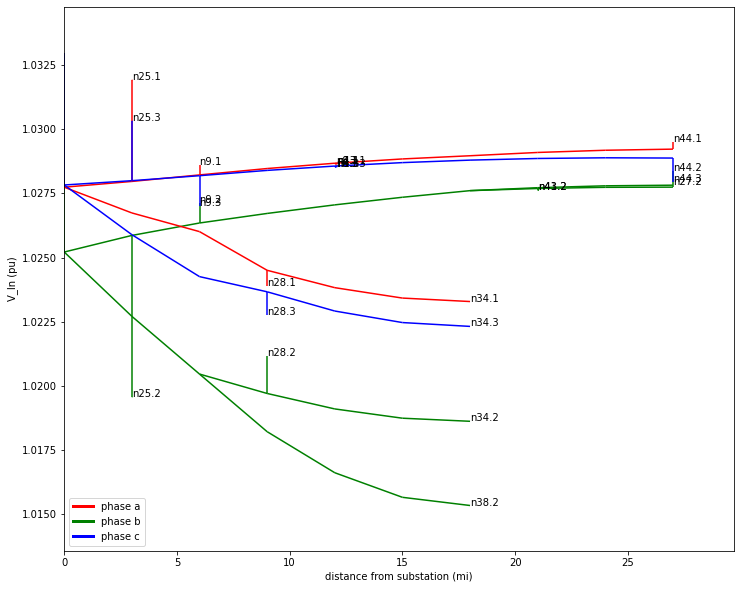

In [8]:
DN.plot_bus_voltages()

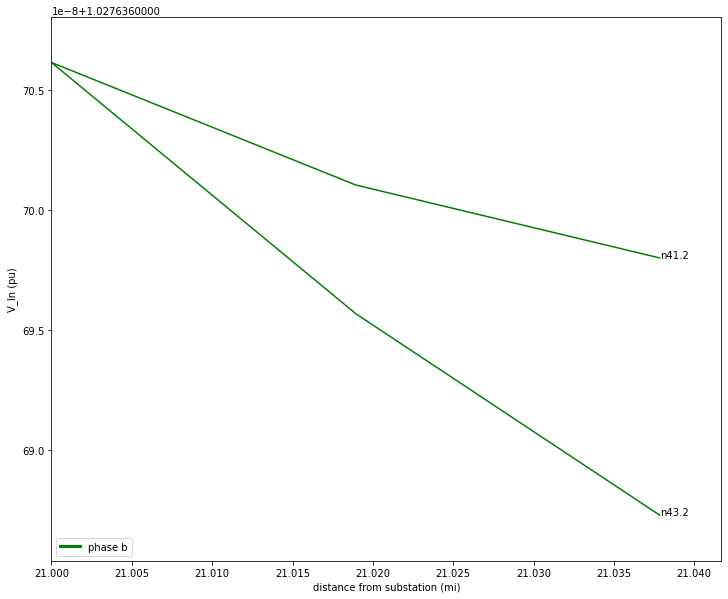

In [9]:
DN.plot_bus_voltages('n39')

In [11]:
import pandas as pd
import numpy as np

bus = 'n24'
dss.Circuit.SetActiveBus(bus)
voltage = np.array(dss.Bus.VMagAngle())
voltage = voltage.reshape(int(voltage.size/2),2)
vpu = np.array(dss.Bus.PuVoltage())
print(vpu)
terms = DN.nodes[bus]['hot_terminals']
vbase = DN.nodes[bus]['Vln_base']
print(vbase)
bus_voltage = pd.DataFrame({
                            'Vmag': voltage[:,0], 
                            'Vang': voltage[:, 1], 
                            'Vpu': (1/(vbase))*voltage[:,0]
                            }, index=terms)
bus_voltage

[ 0.45169271 -0.77188914 -0.88361206  0.00094656  0.4505974   0.77092248]
240.17771198288435


,Vmag,Vang,Vpu
1,247.846015,-59.664759,1.031928
2,244.873898,179.938623,1.019553
3,247.461528,59.694090,1.030327
